In [1]:
from os import path
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import wave
from tqdm import tqdm
import librosa
import librosa.display
import soundfile as sf
import math
import scipy
from scipy import signal
from scipy.io import wavfile

In [7]:
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.models.tools import HoverTool
from bokeh.palettes import BuGn4
from bokeh.plotting import figure, output_notebook, show
from bokeh.transform import cumsum

In [16]:
# src = "XC2628.mp3"
# dst = "test.wav"

In [17]:
# sound = AudioSegment.from_mp3(src)
# sound.export(dst, format="wav")

<_io.BufferedRandom name='test.wav'>

In [18]:
# # get raw audio data as a bytestring
# raw_data = sound.raw_data
# # get the frame rate
# sample_rate = sound.frame_rate
# # get amount of bytes contained in one sample
# sample_size = sound.sample_width
# # get channels
# channels = sound.channels

In [31]:
# data = np.fromstring(raw_data, dtype=np.int16)
# times = np.arange(len(data))/float(sample_rate)

/var/folders/74/n_jzjzyj2sn_bzn46h667d9h0000gn/T/ipykernel_7003/706179217.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(raw_data, dtype=np.int16)


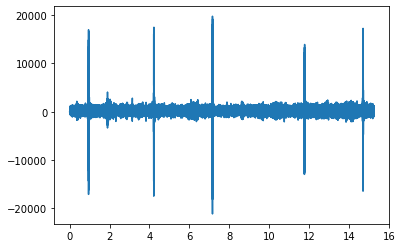

In [34]:
# plt.plot(times, data)

In [2]:
PATH_TRAIN = "./birdsong-recognition/train.csv"

In [3]:
df_train = pd.read_csv(PATH_TRAIN)

In [42]:
# df_train.shape

(21375, 35)

In [43]:
# df_train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [44]:
# df_train.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')

In [4]:
df_bird = df_train.groupby(["species","ebird_code"])["filename"].count().reset_index().rename(columns = {"filename": "recordings"}).sort_values("recordings")

In [155]:
source = ColumnDataSource(df_bird)
tooltips = [
    ("Recordings", "@recordings"),
    ("Bird Species", "@species")
]

v = figure(plot_height = 650, plot_width = 2500, x_range = df_bird.species.values[::-1], tooltips = tooltips, title = "Count of Bird Species")
v.vbar("species", top = "recordings", source = source, width = 0.75, color = "steelblue", alpha = 0.6) #

v.xaxis.axis_label = "Species"
v.yaxis.axis_label = "Count"
v.xaxis.major_label_orientation = math.pi/2

show(v)

In [5]:
df_data = df_bird[df_bird["recordings"]==100]

In [14]:
species = np.array(df_data["species"])
df_train_new = df_train[df_train["species"].isin(species)]
df_train_new = df_train_new[~df_train_new["ebird_code"].isin(['grtgra','eucdov'])]
df_train_new.to_csv("train_new.csv")

In [73]:
# df_data.head()

,species,ebird_code,recordings
126,House Wren,houwre,100
215,Scott's Oriole,scoori,100
42,Blue-grey Gnatcatcher,buggna,100
41,Blue Jay,blujay,100
40,Blue Grosbeak,blugrb1,100


In [52]:
import shutil

In [76]:
# tocp = "./birdsong-recognition/train_audio/"+df_data["ebird_code"][0]
# path = "./temp/"+df_data["ebird_code"][0]
# shutil.copytree(tocp, path)

'./temp/aldfly'

In [78]:
for file in df_data["ebird_code"]:
  # get complete file path
  file_path = "./birdsong-recognition/train_audio/"+file
  targ_path = "./dataset/"+file
  shutil.copytree(file_path, targ_path)

In [93]:
def mp3_wav(s_path, d_path):
    files = []

    for f in os.listdir(s_path):
        if not f.startswith('.') and f.endswith('.mp3'):
            files.append(f)
    for i in tqdm(range(0, len(files))): 
        sound = AudioSegment.from_mp3(s_path+"/"+files[i])
        #print(files[i][:-4])#[:-4]+".wav"
        sound.export(d_path+"/"+files[i][:-4]+".wav", format='wav')
    return 0

In [106]:
for file in df_data["ebird_code"]:
  # get complete file path
  file_path = "./dataset/"+file
  targ_path = "./dataset_wav/"+file
  os.makedirs(targ_path)
  mp3_wav(file_path, targ_path)

100%|██████████| 100/100 [00:14<00:00,  6.78it/s]


In [ ]:
targ = df_data["species"].to_list()

In [10]:
y, sr = librosa.load("XC2628.wav")
mel = librosa.feature.melspectrogram(y=y, sr=sr)

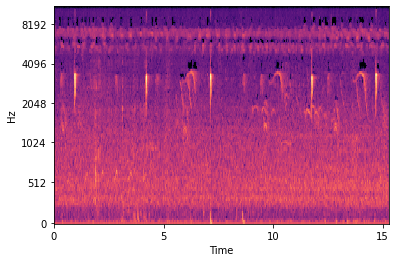

In [18]:
mel_db = librosa.power_to_db(mel)
img = librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr)

plt.savefig("out.png")

In [3]:
def wav_mel(s_path, d_path):
    files = []

    for f in os.listdir(s_path):
        if not f.startswith('.') and f.endswith('.wav'):
            files.append(f)
    for i in tqdm(range(0, len(files))): 
        y, sr = librosa.load(s_path+"/"+files[i])
        mel = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_db = librosa.power_to_db(mel)
        img = librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr)
        plt.savefig(files[i][:-4]+".png")
        
    return 0

In [4]:
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname("./aldfly"))

/var/folders/74/n_jzjzyj2sn_bzn46h667d9h0000gn/T/ipykernel_25431/3298439647.py:1: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname("./aldfly"))


100%|██████████| 100/100 [19:41<00:00, 11.82s/it]


0

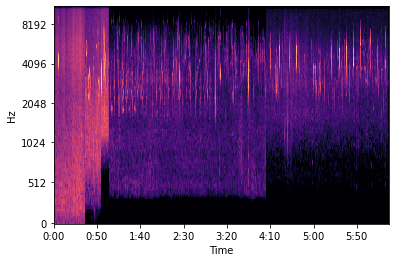

In [5]:
spath = "./dataset_wav/aldfly"
wav_mel(spath, spath)

In [99]:
sr, inputs = wavfile.read("XC142649.wav")

In [100]:
fq = 2*2000/sr
b, a = signal.butter(50, fq, 'highpass')
filtedData = signal.filtfilt(b, a, inputs)

In [101]:
wavfile.write("output.wav", sr, inputs)

In [41]:
samplerate, data = wavfile.read('output.wav')
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector

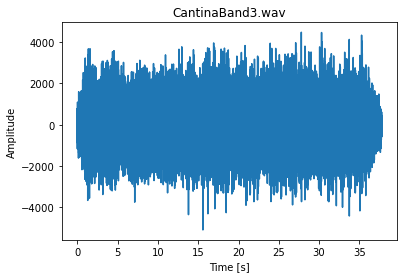

In [32]:
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('CantinaBand3.wav')
plt.show()

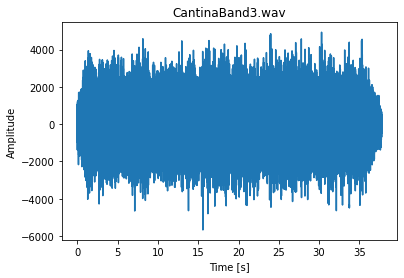

In [33]:
samplerate, data = wavfile.read('XC142649.wav')
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('CantinaBand3.wav')
plt.show()

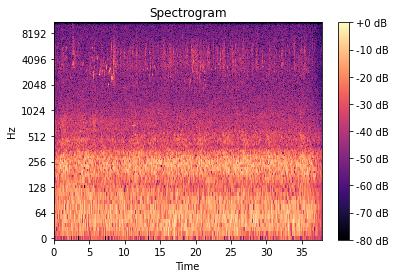

In [36]:
data, sr = librosa.load("XC142649.wav")

spec = np.abs(librosa.stft(data, hop_length =512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

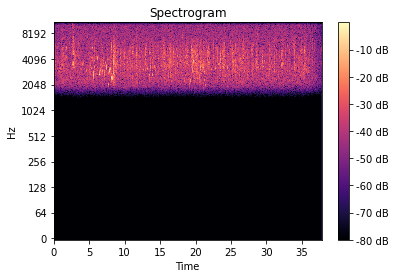

In [42]:
data, sr = librosa.load("output.wav")

spec = np.abs(librosa.stft(data, hop_length =512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

/opt/homebrew/anaconda3/envs/ECE228/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


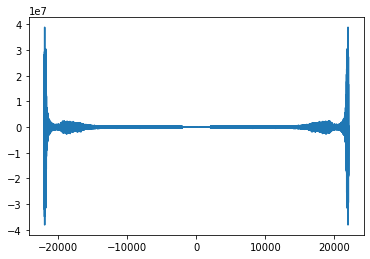

In [87]:
n = inputs.size
df = sr/n
ww = range(-int(n/2),int(n/2))
w = [i*df for i in ww]

yf = scipy.fftpack.fft(inputs)
fig, ax = plt.subplots()
ax.plot(w,yf)

In [164]:
s_path = "./dataset_wav"

for f in os.listdir(s_path):
    files = []
    if not f.startswith('.'):
        targ_path = "./dataset_wav_resample/"+f
        os.makedirs(targ_path)
        files2 = []
        for f2 in os.listdir(s_path+"/"+f):
            if (not f2.startswith('.')) and f2.endswith('.wav'):
                files2.append(f2)
        for i in tqdm(range(0, len(files2))): 
            y, s = librosa.load(s_path+"/"+f+"/"+files2[i], sr = 32000)
            sf.write(targ_path+"/"+files2[i], y, s)
            #print(files[i][:-4])#[:-4]+".wav"

 16%|█▌        | 16/100 [01:04<05:39,  4.05s/it]


KeyboardInterrupt: 

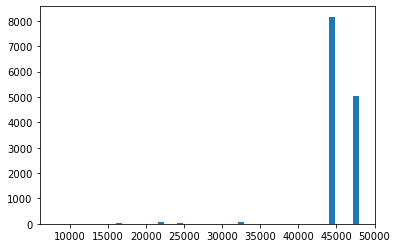

In [146]:
plt.hist(sr,bins=50)
sr2 = np.array(sr)
u,c = np.unique(sr2,return_counts=True)

In [147]:
u

array([ 8000, 11025, 16000, 22050, 24000, 32000, 44100, 48000])

In [148]:
c

array([   2,    1,   23,   82,   28,   70, 8163, 5029])

In [153]:
df_duration = df_train.groupby("duration")["species"].count().reset_index().rename(columns = {"species": "recordings"})

source = ColumnDataSource(df_duration)

tooltips = [
    ("Duration", "@duration"),
    ("Recordings", "@recordings")
]

v = figure(plot_width = 700, plot_height = 500, tooltips = tooltips, title = "Duration of recording")
v.line("duration", "recordings", source = source, width = 2, color = "steelblue", alpha = 1)

v.xaxis.axis_label = "Duration"
v.yaxis.axis_label = "Recordings"

show(v)

In [158]:
df_sampling_rate = df_train.groupby("sampling_rate")["species"].count().reset_index().rename(columns = {"species": "recordings"}).sort_values("recordings", ascending = False)

source = ColumnDataSource(df_sampling_rate)

tooltips = [
    ("Sampling Rate", "@sampling_rate"),
    ("Recordings", "@recordings")
]

v = figure(plot_width = 700, plot_height = 500, x_range = df_sampling_rate.sampling_rate.values, tooltips = tooltips, title = "Distribution of Sampling Rate")
v.vbar("sampling_rate", top = "recordings", source = source, width = 0.4, color = "steelblue", alpha = 1)

v.xaxis.axis_label = "Sampling Rate"
v.yaxis.axis_label = "Recordings"

v.xaxis.major_label_orientation = np.pi / 4
show(v)

In [159]:
df_sampling_rate.head()

,sampling_rate,recordings
5,44100 (Hz),12693
6,48000 (Hz),8373
2,22050 (Hz),123
4,32000 (Hz),93
3,24000 (Hz),54


In [166]:
y,s = librosa.load("XC216606.wav", sr=None)
s

32000